In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Online Ads Click-Through Prediction

<br>
<font size=3>

In online advertising, click-through rate (CTR) is a very important metric for evaluating ad performance. 

Click-through rate is the percentage of people who click on your ad after seeing it.
    
    
$\mbox{CTR of an ad} = \frac{\mbox{Total clicks on the ad}} {\mbox{Total impressions of the ad}}$
    
A high CTR indicates that the ad is likely to generate more sales.  A low CTR means that the ad is not a good match for its audience.

Click-through prediction systems are widely used for sponsored search and real-time bidding.

Data source: https://www.kaggle.com/c/avazu-ctr-prediction/  <b>Please download the training and test datasets before running the following codes</b>.

</font>




## <font color="#0000E0">Sampling a Large Dataset</font>

<div class="alert alert-block alert-info"><font color="#000000">

For ML projects on large datasets, it is often more efficient to build and test ML models based on a sample.

If the original dataset is too large, we should <b>not</b> read it into the memory and downsample. Instead, we should <b>randomly skip rows</b> when reading a large dataset. Pandas <b>'read_csv' function provides 'skiprows' option</b>, so we just need to randomly generate the row indices to be skipped.  To generate row indices, we first find the total number of rows in the dataset.  

We can count the number of rows in a csv file by `sum(1 for row in file)`, where `file` is a file object (Python file objects are iterable) and `(1 for row in file)` is a generator expression in Python. For technical details, refer to https://anandology.com/python-practice-book/iterators.html

There is no need to unzip the file, which can take a large storage space.  We can use <b>gzip</b> package to open a compressed file.

For this file, it takes about 40 seconds to count how many rows in the file: there are over 40 million rows.    
</font></div>

In [2]:
%%time
import gzip
file = gzip.open('C:/Users/owenwu-l/Downloads/MLData/Kaggle_AdsClickThru/train.gz')
print('Total number of records', sum(1 for row in file) - 1)  # -1 due to header

Total number of records 40428967
CPU times: total: 43.5 s
Wall time: 43.9 s


<div class="alert alert-block alert-info"><font color="#000000">
Generate random indices: Example
</font></div>

In [3]:
n = 20
sample_size = 8
print('Original list:', list(range(n)))

import numpy as np
#np.random.seed(1)
print('Method 1:     ',  sorted(np.random.choice(range(n), n-sample_size, replace=False)))

import random
#random.seed(1)
print('Method 2:     ',  sorted(random.sample(range(n), n-sample_size)))

Original list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Method 1:      [0, 1, 2, 6, 8, 9, 11, 12, 14, 15, 16, 18]
Method 2:      [0, 2, 3, 5, 6, 8, 11, 12, 14, 15, 16, 19]


<div class="alert alert-block alert-info"><font color="#000000">
We randomly sample from over 40 million records, read the sample data into a dataframe by using the option <b>skiprows</b> in <b>read_csv</b> function.
</font></div>

In [4]:
%%time
import pandas as pd
import gzip
import random
random.seed(1)

n = 40428967            # total number of records in the clickstream data 
sample_size = 10000     # we sample this many records
file = gzip.open('C:/Users/owenwu-l/Downloads/MLData/Kaggle_AdsClickThru/train.gz')

# 'read_csv' function has an argument 'skiprows'.  Row 0 contains the column names, must not skip.
# Row 1 to n contain the n records, from which we take samples.
skiprows = random.sample(range(1,n+1), n-sample_size)
df = pd.read_csv(file, skiprows = skiprows)

# We store the sample data in a file
df.to_csv('clickthru_sample_10K.csv', index=False)
df

CPU times: total: 1min 30s
Wall time: 1min 31s


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10435075679962880334,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
1,10741018122148503898,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79
2,10899873454337038626,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79
3,11206628535377083752,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
4,12137765677530284783,0,14102100,1005,0,6399eda6,968765cd,f028772b,ecad2386,7801e8d9,...,1,0,16208,320,50,1800,3,167,100074,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,418433785704132869,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,19743,320,50,2264,3,425,100000,61
9996,7139377766731655103,0,14103023,1010,1,85f751fd,c4e18dd6,50e219e0,c7f29df3,7801e8d9,...,4,0,17893,320,50,2039,2,39,100076,32
9997,7154661555145613732,1,14103023,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,22832,320,50,2647,2,39,100148,23
9998,8291669687752023910,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,22815,320,50,2647,2,39,100148,23


## <font color="#0000E0">Data Exploratory Analysis</font>

<div class="alert alert-block alert-info"><font color="#000000">
Hour is expressed in YYMMDDHH, e.g., the string 14103023 means hour 23 on 2014/10/30.    
To explore the CTR patterns, we need to convert the hour string into date and hour.
</font></div>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200)

In [6]:
print(pd.to_datetime('14102109', format='%y%m%d%H'))

2014-10-21 09:00:00


<div class="alert alert-block alert-info"><font color="#000000">

Introducing <b>lambda expression</b>, a shorthand way of defining a function. Reference: https://realpython.com/python-lambda/
</font></div>

In [7]:
f1 = lambda x : x**2
f1(16)

256

In [8]:
# define a parser to be used in the read_csv function next
parser = lambda x : pd.to_datetime(x, format='%y%m%d%H')
print(parser('14102109'))

df = pd.read_csv('clickthru_sample_10K.csv', parse_dates = ['hour'], date_parser = parser)
df

2014-10-21 09:00:00


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10435075679962880334,0,2014-10-21 00:00:00,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
1,10741018122148503898,0,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79
2,10899873454337038626,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79
3,11206628535377083752,0,2014-10-21 00:00:00,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
4,12137765677530284783,0,2014-10-21 00:00:00,1005,0,6399eda6,968765cd,f028772b,ecad2386,7801e8d9,...,1,0,16208,320,50,1800,3,167,100074,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,418433785704132869,0,2014-10-30 23:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,19743,320,50,2264,3,425,100000,61
9996,7139377766731655103,0,2014-10-30 23:00:00,1010,1,85f751fd,c4e18dd6,50e219e0,c7f29df3,7801e8d9,...,4,0,17893,320,50,2039,2,39,100076,32
9997,7154661555145613732,1,2014-10-30 23:00:00,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,22832,320,50,2647,2,39,100148,23
9998,8291669687752023910,0,2014-10-30 23:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,22815,320,50,2647,2,39,100148,23


In [9]:
df.dtypes

id                          uint64
click                        int64
hour                datetime64[ns]
C1                           int64
banner_pos                   int64
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int64
device_conn_type             int64
C14                          int64
C15                          int64
C16                          int64
C17                          int64
C18                          int64
C19                          int64
C20                          int64
C21                          int64
dtype: object

In [13]:
# describe all numeric columns, treating datetime as numeric as well
df.describe( datetime_is_numeric=True )

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+04,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,9.195822e+18,0.169300,2014-10-25 23:08:16.440000,1004.962300,0.285500,1.013900,0.334700,18825.11210,319.274400,59.912600,2111.950100,1.43150,232.725700,53008.775700,82.883300
min,1.798104e+15,0.000000,2014-10-21 00:00:00,1001.000000,0.000000,0.000000,0.000000,375.00000,216.000000,36.000000,112.000000,0.00000,33.000000,-1.000000,1.000000
25%,4.600729e+18,0.000000,2014-10-23 05:00:00,1005.000000,0.000000,1.000000,0.000000,16920.00000,320.000000,50.000000,1863.000000,0.00000,35.000000,-1.000000,23.000000
50%,9.233272e+18,0.000000,2014-10-26 02:00:00,1005.000000,0.000000,1.000000,0.000000,20352.00000,320.000000,50.000000,2325.000000,2.00000,39.000000,100034.000000,61.000000
75%,1.387513e+19,0.000000,2014-10-28 14:00:00,1005.000000,1.000000,1.000000,0.000000,21953.25000,320.000000,50.000000,2526.000000,3.00000,175.000000,100084.000000,101.000000
max,1.844332e+19,1.000000,2014-10-30 23:00:00,1012.000000,7.000000,5.000000,5.000000,24043.00000,1024.000000,768.000000,2757.000000,3.00000,1839.000000,100248.000000,253.000000
std,5.348174e+18,0.375035,NaN,1.091512,0.523275,0.529089,0.863105,5020.29788,23.375032,47.277575,615.974481,1.32472,354.721234,49971.758929,70.035042


In [11]:
# describe all text columns ('O' stands for python object)
df.describe(include=['O'])

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,562,457,16,440,47,19,1755,9105,1358
top,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd
freq,3663,3802,4155,6337,6679,6413,8219,46,585


In [14]:
df['click'].value_counts()

0    8307
1    1693
Name: click, dtype: int64

In [15]:
for var in ['click','banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type']:
    print(df[var].value_counts(), '\n' )

0    8307
1    1693
Name: click, dtype: int64 

0    7248
1    2733
7      16
4       2
2       1
Name: banner_pos, dtype: int64 

50e219e0    4155
f028772b    3146
28905ebd    1774
3e814130     750
f66779e6      50
75fa27f6      42
76b2941d      26
335d28a8      22
c0dd3be3       9
70fb0e29       6
72722551       5
8fd0aea4       5
dedf689d       4
0569f928       3
a818d37a       2
e787de0e       1
Name: site_category, dtype: int64 

07d7df22    6413
0f2161f8    2393
cef3e649     413
8ded1f7a     382
f95efa07     305
d1327cf5      25
09481d60      15
dc97ec06      14
75d80bbe       9
879c24eb       6
fc6fa53d       5
a3c42688       5
4ce2e9fc       4
0f9a328c       3
a86a3e89       3
2281a340       2
a7fd01ec       1
4681bb9d       1
8df2e842       1
Name: app_category, dtype: int64 

1    9224
0     557
4     180
5      39
Name: device_type, dtype: int64 

0    8623
2     816
3     545
5      16
Name: device_conn_type, dtype: int64 



In [16]:
df.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

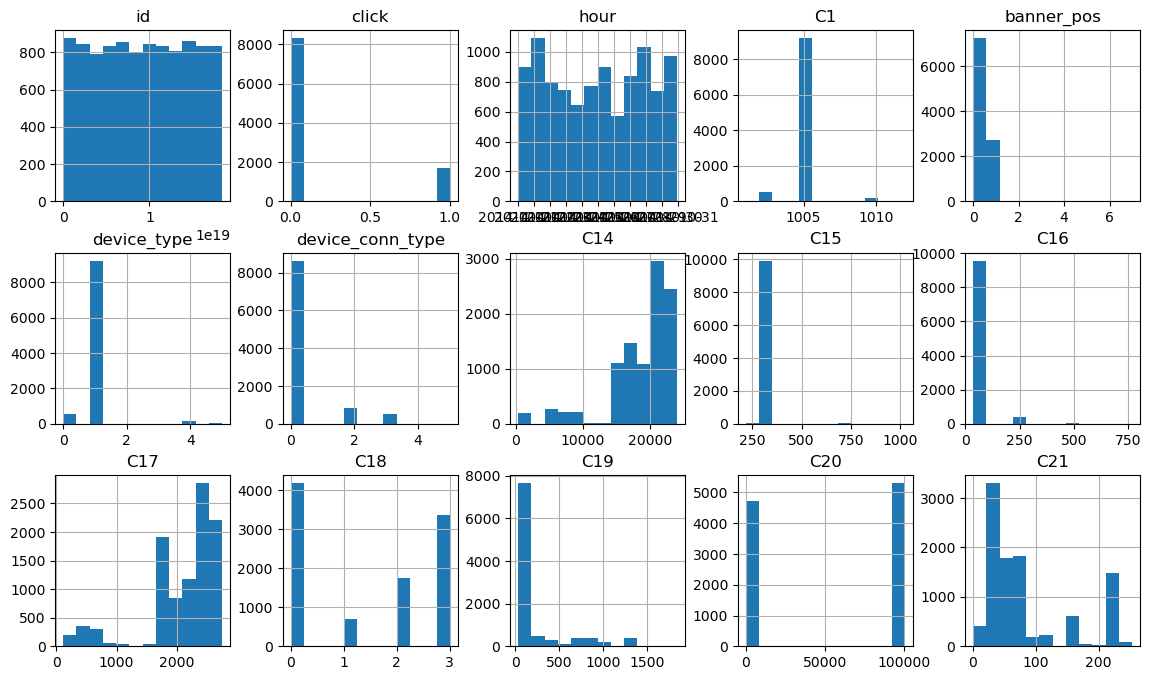

In [17]:
df.hist(bins=12, figsize=(14,8), layout=(3,-1))
plt.show()

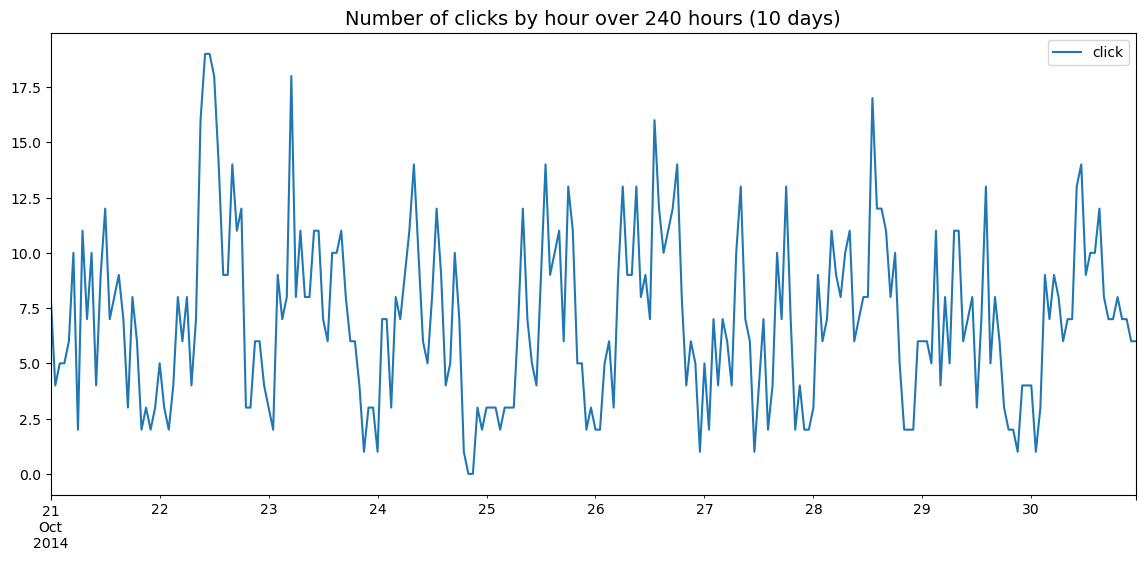

In [18]:
df.groupby('hour').agg({'click':'sum'}).plot(figsize=(14,6))
plt.xlabel('')
plt.title('Number of clicks by hour over 240 hours (10 days)',fontsize=14)
plt.show()

### Add a new feature: hour of day

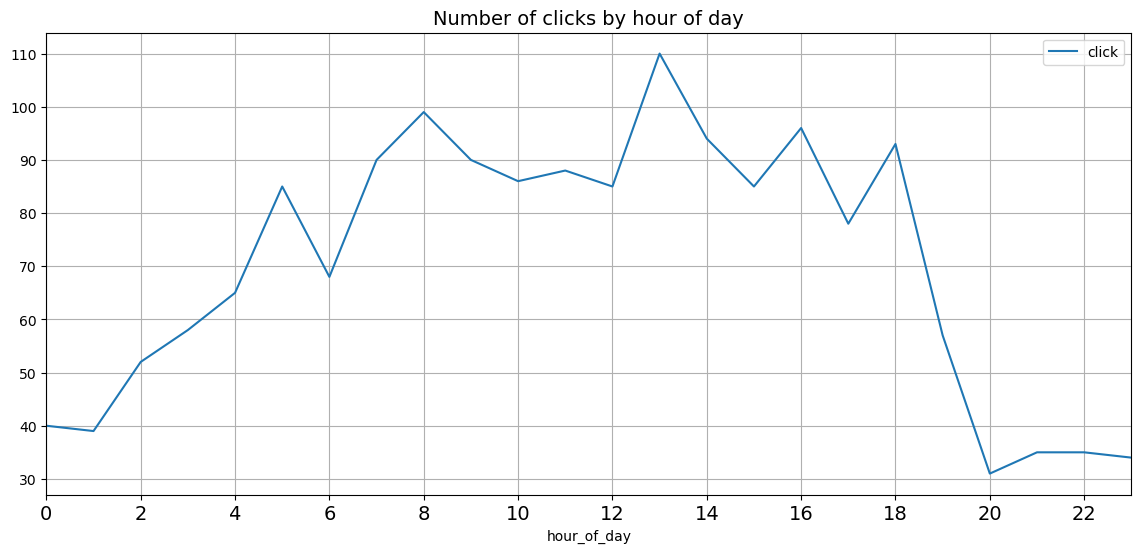

In [20]:
df['hour_of_day'] = df['hour'].apply(lambda x: x.hour)
df.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(14,6))
plt.title('Number of clicks by hour of day', fontsize=14)
plt.grid()
plt.margins(x=0)
plt.xticks(np.arange(0, 24,2), fontsize=14)
plt.show()

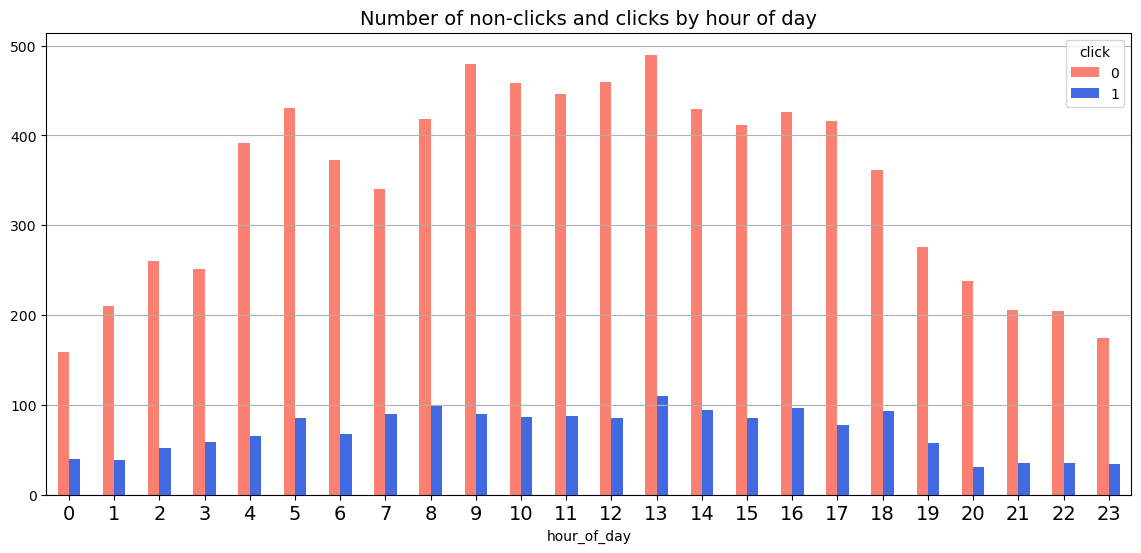

In [21]:
counts = df.groupby(['hour_of_day', 'click']).size().unstack()
counts.plot(kind='bar', figsize=(14,6), color=['salmon', 'royalblue'])
plt.title('Number of non-clicks and clicks by hour of day', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=0, fontsize=14)
plt.show()

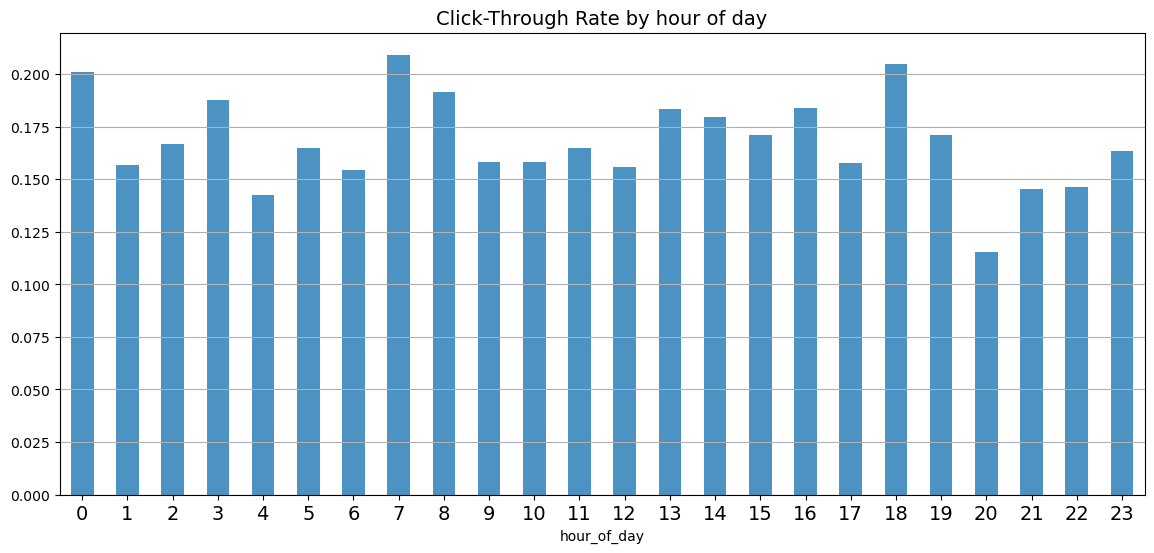

In [22]:
CTR = counts[1]/(counts[0]+counts[1])
CTR.plot(kind='bar', figsize=(14,6), alpha=0.8)
plt.grid(axis='y')
plt.title('Click-Through Rate by hour of day', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.show()

### Add a new feature: day of week

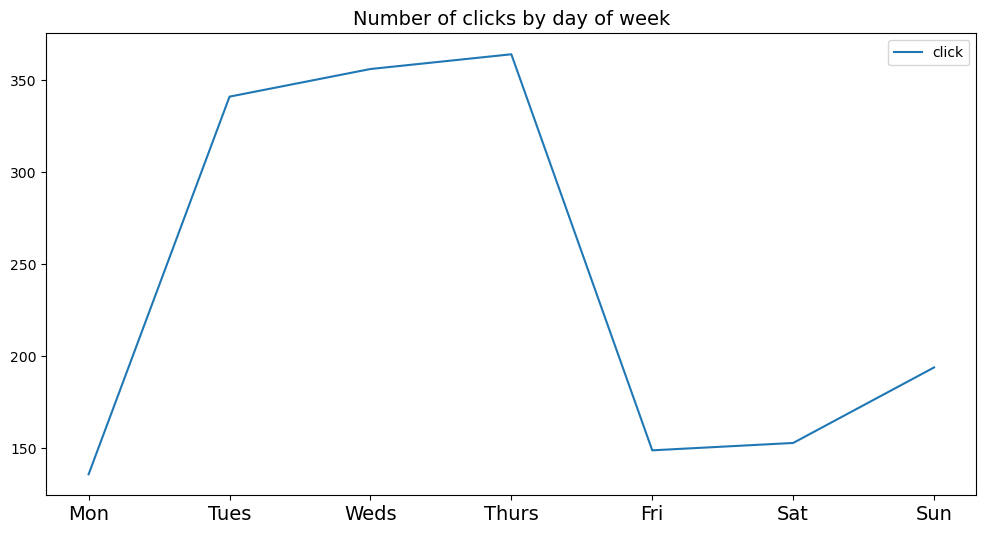

In [23]:
df['day_of_week'] = df['hour'].apply(lambda x: x.dayofweek)
df.groupby('day_of_week').agg({'click':'sum'}).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels, fontsize=14)
plt.xlabel('')
plt.title('Number of clicks by day of week', fontsize=14)
plt.show()

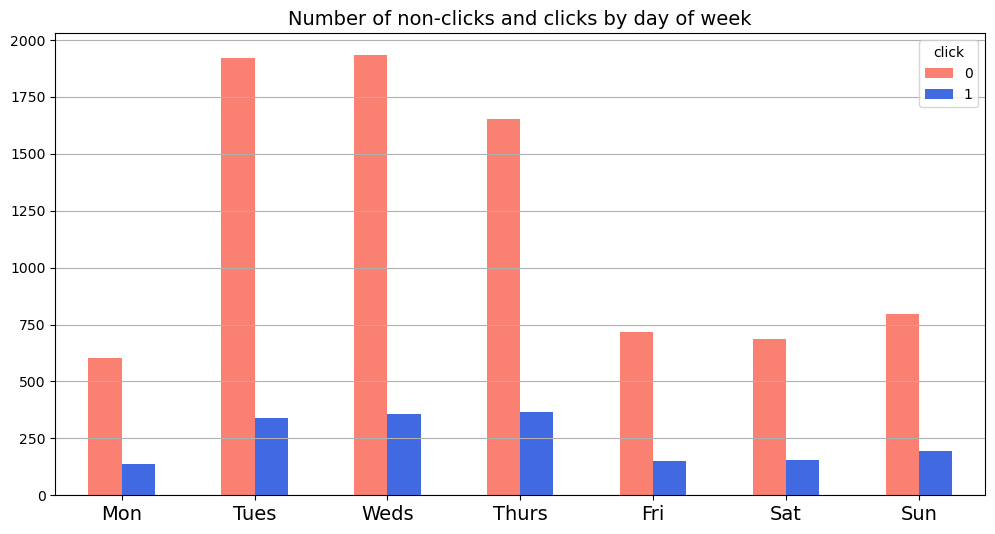

In [24]:
counts = df.groupby(['day_of_week', 'click']).size().unstack()
counts.plot(kind='bar', figsize=(12,6), color=['salmon', 'royalblue'])
plt.xticks(ticks, labels, rotation=0, fontsize=14)
plt.title('Number of non-clicks and clicks by day of week', fontsize=14)
plt.xlabel('')
plt.grid(axis='y')
plt.show()

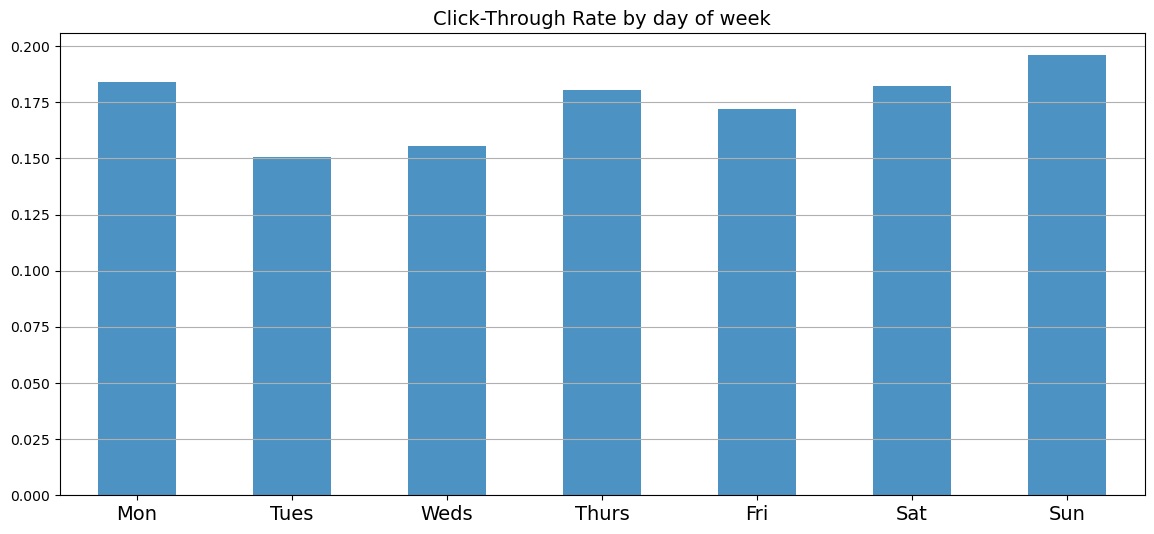

In [25]:
CTR = counts[1]/(counts[0]+counts[1])
CTR.plot(kind='bar', figsize=(14,6), alpha=0.8)
plt.xticks(ticks, labels, rotation=0, fontsize=14)
plt.title('Click-Through Rate by day of week', fontsize=14)
plt.xlabel('')
plt.grid(axis='y')
plt.show()

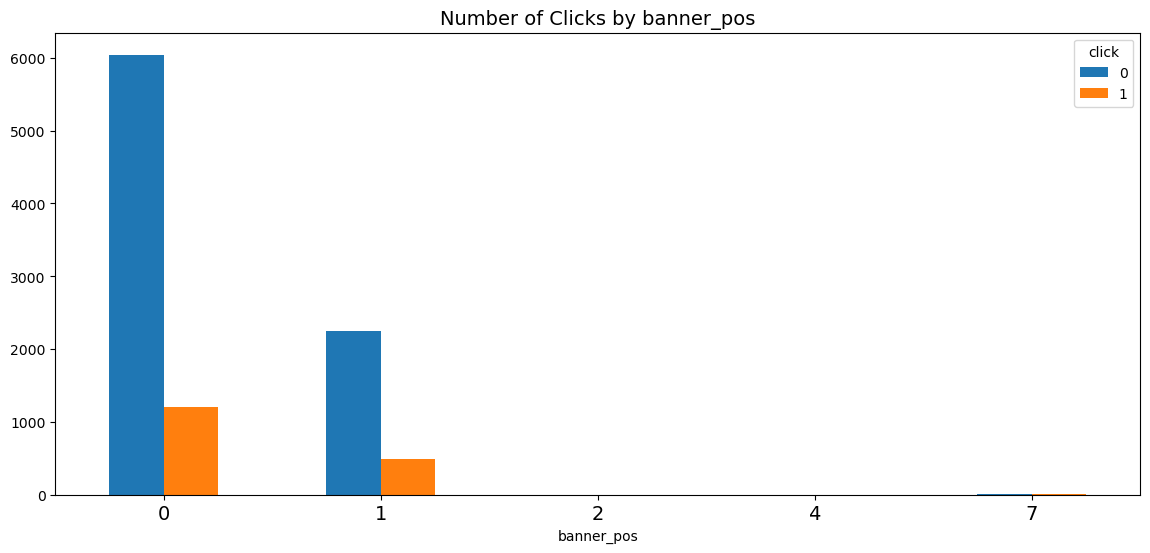

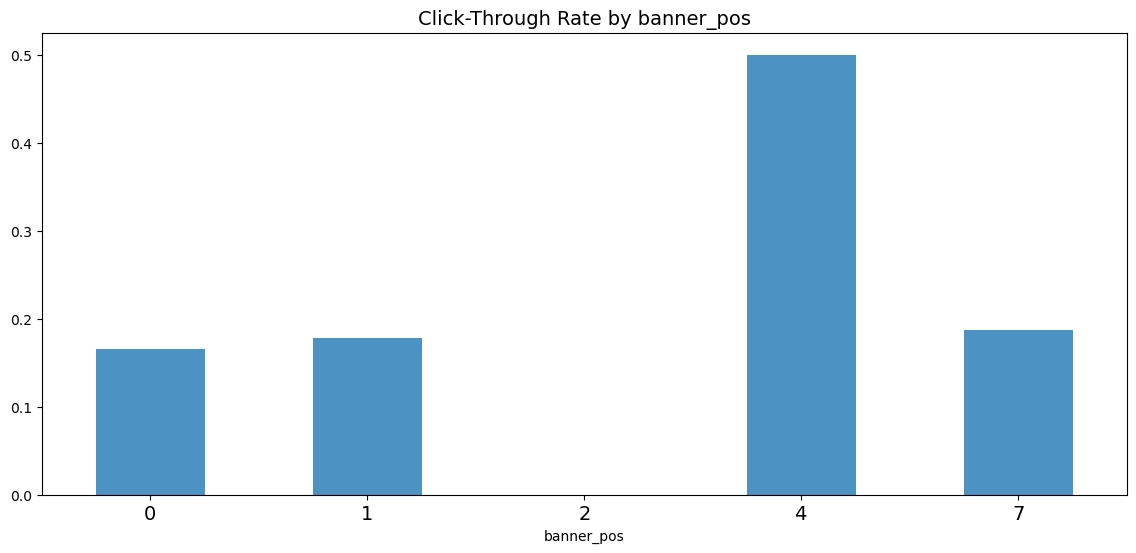

In [26]:
feature = 'banner_pos'
#feature = 'device_type'

counts = df.groupby([feature,'click']).size().unstack()
counts.plot(kind='bar', figsize=(14,6))
plt.title('Number of Clicks by ' + feature, fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.show()

CTR = counts[1]/(counts[0]+counts[1])
CTR.plot(kind='bar', figsize=(14,6), alpha=0.8)
plt.title('Click-Through Rate by ' + feature, fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.show()

## Building a Machine Learning Model

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200)


parser = lambda x : pd.to_datetime(x, format='%y%m%d%H')
df = pd.read_csv('clickthru_sample_10K.csv', parse_dates = ['hour'], date_parser = parser)

df['hour_of_day'] = df['hour'].apply(lambda x: x.hour)
df['day_of_week'] = df['hour'].apply(lambda x: x.dayofweek)

X = df.drop(['click', 'hour', 'id', 'device_id', 'device_ip'], axis=1)
y = df['click']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=1)

In [28]:
# Pipeline and column transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# Data transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Data splitter and model evaluator
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, GridSearchCV

# Learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor 

# Performance metrics
from sklearn.metrics import log_loss, roc_auc_score


cat_col = ['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
           'app_domain', 'app_category', 'device_model', 'device_type',
           'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
           'C21', 'day_of_week', 'hour_of_day']      # categorical features
num_col = ['hour_of_day']             # numerical features

pipe = make_pipeline(ColumnTransformer( [ ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col),
                                          ('num', 'passthrough', num_col) ] ),
                     #SVC(kernel='rbf', C=10, gamma=0.01) #, probability=True)
                     LogisticRegression( C=0.01, max_iter=10000)
                     #DecisionTreeClassifier(criterion='gini', max_depth=10)
                     #RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, max_depth=20)
                     #KNeighborsClassifier(n_neighbors=5, p=2)
                    )

pipe.fit(X_train,y_train)
print('Training accuracy:', pipe.score(X_train,y_train))
print('Test accuracy:    ', pipe.score(X_test,y_test))

y_pred_proba = pipe.predict_proba(X_test)[:,1]
print('Test log loss:    ', log_loss(y_test, y_pred_proba))
print('Test ROC AUC:     ', roc_auc_score(y_test, y_pred_proba))

Training accuracy: 0.830625
Test accuracy:     0.8305
Test log loss:     0.42559791717966755
Test ROC AUC:      0.6794916876672723


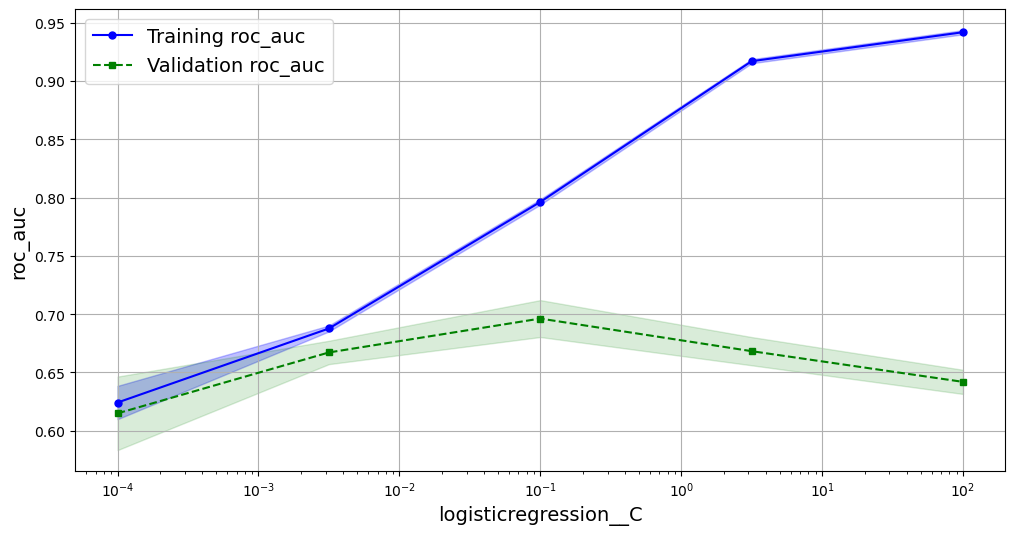

In [29]:
#param_name  = 'svc__gamma'
#param_range = np.logspace(-5, 1, 5)

param_name  = 'logisticregression__C'
param_range = np.logspace(-4, 2, 5)

#param_name  = 'decisiontreeclassifier__max_depth'
#param_range = np.arange(1,15,3)

#param_name  = 'randomforestclassifier__max_depth'
#param_range = np.arange(5,31,5)

#param_name  = 'kneighborsclassifier__n_neighbors'
#param_range = np.arange(1,26,2)

#scoring='r2'
#scoring='accuracy'
#scoring='neg_log_loss'
scoring='roc_auc'

train_scores, val_scores = validation_curve(estimator=pipe, X=X_train, y=y_train, 
                                            cv=5, 
                                            param_name=param_name, 
                                            param_range=param_range,
                                            scoring=scoring
                                           )

trn_mean = np.mean(train_scores, axis=1)
trn_std  = np.std (train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std  = np.std (val_scores, axis=1)

plt.figure(figsize=(12,6))
plt.plot(param_range, trn_mean, 'bo-',  markersize=5, label='Training '+ scoring)
plt.fill_between(param_range, trn_mean+trn_std, trn_mean-trn_std, alpha=0.25, color='blue')

plt.plot(param_range, val_mean, 'gs--', markersize=5, label='Validation '+ scoring)
plt.fill_between(param_range, val_mean+val_std, val_mean-val_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')  # Use this only when param_range = np.logspace(...). Comment this out otherwise.
plt.legend(loc='best', fontsize=14)
plt.xlabel(param_name, fontsize=14)
plt.ylabel(scoring, fontsize=14)
#plt.savefig('val_curve')
plt.show()

### Learning curve

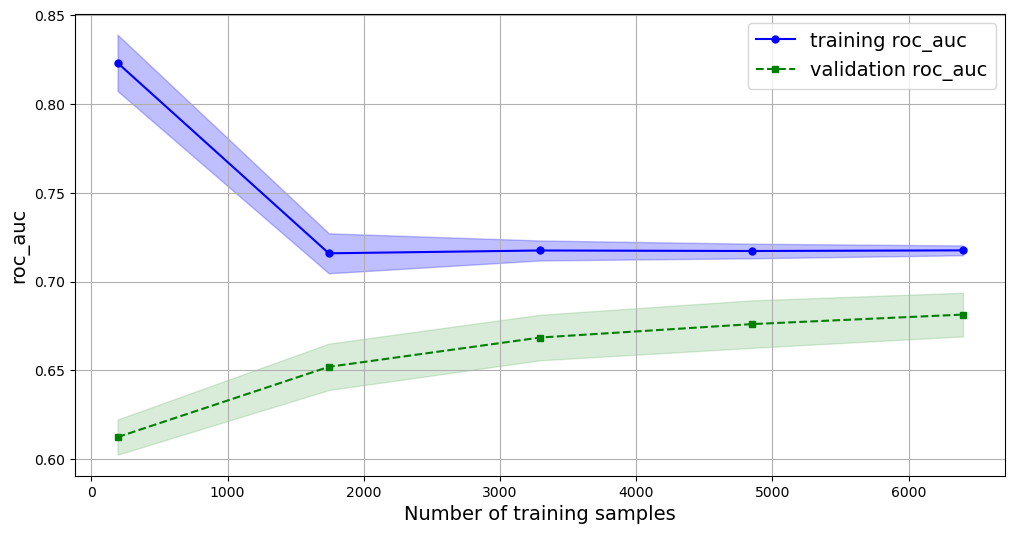

In [30]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.03, 1.0, 5),
                                                        cv=5,
                                                        scoring=scoring
                                                       )
train_mean= np.mean(train_scores, axis=1)
train_std = np.std (train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std (test_scores, axis=1)

plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean, 'bo-', markersize=5, label='training '+ scoring)
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.25, color='blue')

plt.plot(train_sizes, test_mean, 'gs--', markersize=5, label='validation '+ scoring)
plt.fill_between(train_sizes, test_mean + test_std,  test_mean - test_std,   alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples', fontsize=14)
plt.ylabel(scoring, fontsize=14)
plt.legend(loc='best', fontsize=14)
# plt.savefig('learning_curve', dpi=300)
plt.show()

<b>Notes on Log Loss:</b>

Logarithmic Loss, or simply Log Loss, is a classification loss function often used as an evaluation metric in Kaggle competitions. Log Loss quantifies the accuracy of a classifier by penalizing false classifications.

In order to calculate Log Loss the classifier must assign a probability to each class rather than simply yielding the most likely class. Mathematically Log Loss is defined as

$$ - \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^c y_{ij} \log \, p_{ij} $$

where $n$ is the number of samples, $c$ is the number of possible class labels, $y_{ij}$ is an indicator of whether or not instance $i$ actually belongs class $j$, and $p_{ij}$ is the model's predicted probability that instance $i$ belongs to class $j$. A perfect classifier would have a Log Loss of precisely zero. Less ideal classifiers have progressively larger values of Log Loss. If there are only two classes then the expression above simplifies to

$$ - \frac{1}{n} \sum_{i=1}^n [y_{i} \log \, p_{i} + (1 - y_{i}) \log \, (1 - p_{i})].$$

Note that <b>for each instance only the term for the correct class actually contributes to the sum</b>.

In [5]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']